<a href="https://colab.research.google.com/github/Amishak11/Spotigy_Churn_Analysis/blob/main/9047_final_year_(CA2_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spotify Churn Analysis**

**PART A: Data Preparation Questions (1–10)**

1. Load the dataset into a Pandas DataFrame and display the first 5 records.

In [ ]:
import pandas as pd
import numpy as np
import re
from pathlib import Path

In [ ]:
DATA_PATH = Path("/content/drive/MyDrive/TYCS (SEM06)/Machine Learning /Project/spotify_churn_dataset.csv")
df = pd.read_csv(DATA_PATH)

print("1) First 5 records:")
display(df.head())

1) First 5 records:


,user_id,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,churned,subscription_type_Premium,country_BR,country_CA,...,country_PK,country_RU,country_UK,country_US,top_genre_Country,top_genre_Electronic,top_genre_Hip-Hop,top_genre_Jazz,top_genre_Pop,top_genre_Rock
0,user_1,134.9,4,6,0,1,0,True,False,False,...,False,False,False,True,False,True,False,False,False,False
1,user_2,165.7,5,8,0,12,0,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,user_3,45.9,3,3,0,3,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,user_4,106.0,0,7,0,3,0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
4,user_5,89.6,5,2,1,6,0,True,False,False,...,False,False,False,True,True,False,False,False,False,False


2. Identify the number of rows and columns in the dataset.

In [ ]:
print("\n2) Shape (rows, cols):", df.shape)


2) Shape (rows, cols): (1000, 23)


3. Rename column names to make them Python-friendly and consistent.

In [ ]:
def python_friendly(col: str) -> str:
    col = col.strip().lower()
    col = re.sub(r"[^a-z0-9]+", "_", col)
    col = col.strip("_")
    return col if col else "col"

old_cols = df.columns.tolist()
new_cols = [python_friendly(c) for c in old_cols]


seen = {}
unique_cols = []
for c in new_cols:
    if c not in seen:
        seen[c] = 0
        unique_cols.append(c)
    else:
        seen[c] += 1
        unique_cols.append(f"{c}_{seen[c]}")

df.rename(columns=dict(zip(old_cols, unique_cols)), inplace=True)

print("\n3) Renamed columns:")
for o, n in zip(old_cols, unique_cols):
    if o != n:
        print(f"   {o}  ->  {n}")



3) Renamed columns:
   subscription_type_Premium  ->  subscription_type_premium
   country_BR  ->  country_br
   country_CA  ->  country_ca
   country_DE  ->  country_de
   country_FR  ->  country_fr
   country_IN  ->  country_in
   country_PK  ->  country_pk
   country_RU  ->  country_ru
   country_UK  ->  country_uk
   country_US  ->  country_us
   top_genre_Country  ->  top_genre_country
   top_genre_Electronic  ->  top_genre_electronic
   top_genre_Hip-Hop  ->  top_genre_hip_hop
   top_genre_Jazz  ->  top_genre_jazz
   top_genre_Pop  ->  top_genre_pop
   top_genre_Rock  ->  top_genre_rock


4. Identify and classify columns into categorical, numerical, and binary variables.

In [ ]:
def is_binary_series(s: pd.Series) -> bool:
    s2 = s.dropna()
    if s2.dtype == "object":
        s2 = s2.astype(str).str.strip().str.lower().replace(
            {"yes": 1, "no": 0, "true": 1, "false": 0, "y": 1, "n": 0}
        )
    uniq = pd.unique(s2)
    if len(uniq) == 0:
        return False
    try:
        uniq_num = pd.to_numeric(pd.Series(uniq), errors="raise").unique()
        return set(uniq_num).issubset({0, 1}) and len(set(uniq_num)) <= 2
    except Exception:
        return len(uniq) <= 2
categorical_cols = []
numerical_cols = []
binary_cols = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        if is_binary_series(df[col]):
            binary_cols.append(col)
        else:
            numerical_cols.append(col)
    else:
        if is_binary_series(df[col]):
            binary_cols.append(col)
        else:
            categorical_cols.append(col)
print("\n4) Column classification:")
print("   Categorical:", categorical_cols)
print("   Numerical  :", numerical_cols)
print("   Binary     :", binary_cols)


4) Column classification:
   Categorical: ['user_id']
   Numerical  : ['avg_daily_minutes', 'number_of_playlists', 'skips_per_day', 'support_tickets', 'days_since_last_login']
   Binary     : ['churned', 'subscription_type_premium', 'country_br', 'country_ca', 'country_de', 'country_fr', 'country_in', 'country_pk', 'country_ru', 'country_uk', 'country_us', 'top_genre_country', 'top_genre_electronic', 'top_genre_hip_hop', 'top_genre_jazz', 'top_genre_pop', 'top_genre_rock']


5. Check for missing or null values in each column.

In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_report = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
print("\n5) Missing values report:")
display(missing_report)


5) Missing values report:


,missing_count,missing_pct
user_id,0,0.0
avg_daily_minutes,0,0.0
number_of_playlists,0,0.0
skips_per_day,0,0.0
support_tickets,0,0.0
days_since_last_login,0,0.0
churned,0,0.0
subscription_type_premium,0,0.0
country_br,0,0.0
country_ca,0,0.0


6. Validate logical ranges for numerical columns (e.g., non-negative minutes, skips, tickets).

In [ ]:
non_negative_keywords = ["minute", "minutes", "skip", "skips", "ticket", "tickets", "day", "daily", "count", "num"]
candidate_nonneg = [c for c in numerical_cols if any(k in c for k in non_negative_keywords)]

range_checks = []
for c in candidate_nonneg:
    min_val = df[c].min(skipna=True)
    max_val = df[c].max(skipna=True)
    negatives = (df[c] < 0).sum(skipna=True)
    range_checks.append([c, min_val, max_val, int(negatives)])

range_report = pd.DataFrame(range_checks, columns=["column", "min", "max", "negative_values_count"]).sort_values(
    by="negative_values_count", ascending=False
)
print("\n6) Logical range checks (non-negative candidates):")
display(range_report)


6) Logical range checks (non-negative candidates):


,column,min,max,negative_values_count
0,avg_daily_minutes,-37.2,237.8,7
1,number_of_playlists,0.0,10.0,0
2,skips_per_day,0.0,14.0,0
3,support_tickets,0.0,2.0,0
4,days_since_last_login,0.0,58.0,0


7. Encode categorical variables such as subscription_type, country, and top_genre.

In [ ]:
to_encode = [c for c in ["subscription_type", "country", "top_genre"] if c in df.columns]

print("\n7) Categorical columns to encode (found):", to_encode)


7) Categorical columns to encode (found): ['subscription_type', 'country', 'top_genre']


8. Convert the churned column into a binary target variable and verify class distribution.

In [ ]:
target_col = "churned" if "churned" in df.columns else None
if target_col is None:
    raise KeyError("Could not find a 'churned' column after renaming. Please check your dataset columns.")

def to_binary_target(series: pd.Series) -> pd.Series:
    s = series.copy()
    if pd.api.types.is_numeric_dtype(s):
        return (s.fillna(0) != 0).astype(int)
    s = s.astype(str).str.strip().str.lower()
    mapping = {
        "1": 1, "0": 0,
        "yes": 1, "no": 0,
        "true": 1, "false": 0,
        "churned": 1, "not churned": 0,
        "y": 1, "n": 0
    }
    mapped = s.map(mapping)
    mapped = mapped.fillna(s.str.contains("churn").astype(int))
    return mapped.astype(int)

df[target_col] = to_binary_target(df[target_col])

print("\n8) Target column 'churned' converted to binary. Class distribution:")
class_dist = df[target_col].value_counts(dropna=False).rename_axis("churned").reset_index(name="count")
class_dist["pct"] = (class_dist["count"] / len(df) * 100).round(2)
display(class_dist)



8) Target column 'churned' converted to binary. Class distribution:


,churned,count,pct
0,0,814,81.4
1,1,186,18.6


9. Identify outliers in avg_daily_minutes and skips_per_day.

In [ ]:
outlier_cols = [c for c in ["avg_daily_minutes", "skips_per_day"] if c in df.columns]
print("\n9) Outlier columns found:", outlier_cols)
def iqr_outliers(s: pd.Series) -> pd.Series:
    s = s.dropna()
    if s.empty:
        return pd.Series(dtype=bool)
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (s < lower) | (s > upper), (lower, upper, q1, q3, iqr)

outlier_summary = []
outlier_flags = pd.DataFrame(index=df.index)

for c in outlier_cols:
    mask, stats = iqr_outliers(df[c])
    full_mask = pd.Series(False, index=df.index)
    full_mask.loc[mask.index] = mask.values
    outlier_flags[f"{c}_is_outlier"] = full_mask
    lower, upper, q1, q3, iqr = stats
    outlier_summary.append([c, float(q1), float(q3), float(iqr), float(lower), float(upper), int(full_mask.sum())])

outlier_report = pd.DataFrame(
    outlier_summary,
    columns=["column", "q1", "q3", "iqr", "lower_bound", "upper_bound", "outlier_count"]
)
print("\n9) Outlier report (IQR method):")
display(outlier_report)



9) Outlier columns found: ['avg_daily_minutes', 'skips_per_day']

9) Outlier report (IQR method):


,column,q1,q3,iqr,lower_bound,upper_bound,outlier_count
0,avg_daily_minutes,65.9,129.75,63.85,-29.875,225.525,3
1,skips_per_day,3.0,6.00,3.00,-1.500,10.500,25


10. Create a cleaned dataset and document all preprocessing steps performed.

In [ ]:
preprocessing_steps = []
df_clean = df.copy()
neg_fix_cols = [c for c in candidate_nonneg if c in df_clean.columns]
for c in neg_fix_cols:
    neg_count = int((df_clean[c] < 0).sum(skipna=True))
    if neg_count > 0:
        df_clean[c] = df_clean[c].clip(lower=0)
        preprocessing_steps.append(f"Clipped negative values to 0 in '{c}' (fixed {neg_count} rows).")
if to_encode:
    before_cols = df_clean.shape[1]
    df_clean = pd.get_dummies(df_clean, columns=to_encode, drop_first=False, dummy_na=True)
    after_cols = df_clean.shape[1]
    preprocessing_steps.append(
        f"One-hot encoded {to_encode} with dummy_na=True (columns increased from {before_cols} to {after_cols})."
    )
num_cols_after = [c for c in df_clean.columns if pd.api.types.is_numeric_dtype(df_clean[c]) and c != target_col]
cat_cols_after = [c for c in df_clean.columns if not pd.api.types.is_numeric_dtype(df_clean[c]) and c != target_col]
filled_numeric = 0
for c in num_cols_after:
    if df_clean[c].isna().any():
        med = df_clean[c].median()
        n = int(df_clean[c].isna().sum())
        df_clean[c] = df_clean[c].fillna(med)
        filled_numeric += n
        preprocessing_steps.append(f"Filled {n} missing values in numeric column '{c}' using median={med}.")
filled_categorical = 0
for c in cat_cols_after:
    if df_clean[c].isna().any():
        n = int(df_clean[c].isna().sum())
        df_clean[c] = df_clean[c].fillna("unknown")
        filled_categorical += n
        preprocessing_steps.append(f"Filled {n} missing values in categorical column '{c}' with 'unknown'.")

for c in outlier_cols:
    if c in df_clean.columns and pd.api.types.is_numeric_dtype(df_clean[c]):

        s = df_clean[c]
        q1, q3 = s.quantile(0.25), s.quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        out_cnt = int(((s < lower) | (s > upper)).sum())
        if out_cnt > 0:
            df_clean[c] = s.clip(lower=lower, upper=upper)
            preprocessing_steps.append(f"Capped {out_cnt} outliers in '{c}' to IQR bounds [{lower}, {upper}].")
for c in outlier_flags.columns:
    if c not in df_clean.columns:
        df_clean[c] = outlier_flags[c].astype(int)
        preprocessing_steps.append(f"Added outlier flag column '{c}' (0/1).")
print("\n10) Preprocessing steps performed:")
for i, step in enumerate(preprocessing_steps, start=1):
    print(f"   {i}. {step}")

print("\nCleaned dataset shape:", df_clean.shape)
display(df_clean.head())
CLEAN_PATH = Path("/content/spotify_churn_dataset_cleaned.csv")
LOG_PATH = Path("/content/spotify_churn_preprocessing_steps.txt")
df_clean.to_csv(CLEAN_PATH, index=False)
LOG_PATH.write_text("\n".join(preprocessing_steps), encoding="utf-8")
print("\nSaved files:")
print(" - Cleaned CSV:", CLEAN_PATH)
print(" - Steps log  :", LOG_PATH)


10) Preprocessing steps performed:
   1. Clipped negative values to 0 in 'avg_daily_minutes' (fixed 7 rows).
   2. One-hot encoded ['subscription_type', 'country', 'top_genre'] with dummy_na=True (columns increased from 9 to 28).
   3. Capped 2 outliers in 'avg_daily_minutes' to IQR bounds [-29.874999999999986, 225.52499999999998].
   4. Capped 25 outliers in 'skips_per_day' to IQR bounds [-1.5, 10.5].
   5. Added outlier flag column 'avg_daily_minutes_is_outlier' (0/1).
   6. Added outlier flag column 'skips_per_day_is_outlier' (0/1).

Cleaned dataset shape: (1000, 30)


,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,churned,subscription_type_0.0,subscription_type_1.0,subscription_type_nan,country_0.0,...,top_genre_0.0,top_genre_1.0,top_genre_2.0,top_genre_3.0,top_genre_4.0,top_genre_5.0,top_genre_6.0,top_genre_nan,avg_daily_minutes_is_outlier,skips_per_day_is_outlier
0,134.9,4,6.0,0,1,0,False,True,False,False,...,False,False,True,False,False,False,False,False,0,0
1,165.7,5,8.0,0,12,0,False,True,False,False,...,False,False,False,False,False,True,False,False,0,0
2,45.9,3,3.0,0,3,0,True,False,False,False,...,True,False,False,False,False,False,False,False,0,0
3,106.0,0,7.0,0,3,0,False,True,False,False,...,False,False,False,False,True,False,False,False,0,0
4,89.6,5,2.0,1,6,0,False,True,False,False,...,False,True,False,False,False,False,False,False,0,0



Saved files:
 - Cleaned CSV: /content/spotify_churn_dataset_cleaned.csv
 - Steps log  : /content/spotify_churn_preprocessing_steps.txt


**🔹 PART B: Exploratory Data Analysis (EDA) Questions (11–25)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path
DATA_PATH = Path("/content/spotify_churn_dataset.csv")
df_raw = pd.read_csv(DATA_PATH)
def python_friendly(col: str) -> str:
    col = col.strip().lower()
    col = re.sub(r"[^a-z0-9]+", "_", col).strip("_")
    return col if col else "col"
old_cols = df_raw.columns.tolist()
new_cols = [python_friendly(c) for c in old_cols]
seen = {}
unique_cols = []
for c in new_cols:
    if c not in seen:
        seen[c] = 0
        unique_cols.append(c)
    else:
        seen[c] += 1
        unique_cols.append(f"{c}_{seen[c]}")
df = df_raw.rename(columns=dict(zip(old_cols, unique_cols))).copy()
def to_binary_target(series: pd.Series) -> pd.Series:
    s = series.copy()
    if pd.api.types.is_numeric_dtype(s):
        return (s.fillna(0) != 0).astype(int)
    s = s.astype(str).str.strip().str.lower()
    mapping = {"1": 1, "0": 0, "yes": 1, "no": 0, "true": 1, "false": 0, "y": 1, "n": 0}
    mapped = s.map(mapping)
    mapped = mapped.fillna(s.str.contains("churn").astype(int))
    return mapped.astype(int)
if "churned" not in df.columns:
    raise KeyError("Expected a 'churned' column in the dataset.")
df["churned"] = to_binary_target(df["churned"])
if "subscription_type" in df.columns:

    if pd.api.types.is_numeric_dtype(df["subscription_type"]):

        df["subscription_type_label"] = df["subscription_type"].map({0: "Free", 1: "Premium"}).fillna(df["subscription_type"].astype(str))
    else:
        df["subscription_type_label"] = df["subscription_type"].astype(str).str.strip()
else:
    df["subscription_type_label"] = "Unknown"
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c != "churned"]
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset shape: (1000, 11)
Columns: ['user_id', 'subscription_type', 'country', 'avg_daily_minutes', 'number_of_playlists', 'top_genre', 'skips_per_day', 'support_tickets', 'days_since_last_login', 'churned', 'subscription_type_label']


11. Generate summary statistics for numerical features.

In [ ]:

summary_stats = df[num_cols].describe().T
print("\n11) Summary statistics (numerical features):")
display(summary_stats)


11) Summary statistics (numerical features):


,count,mean,std,min,25%,50%,75%,max
avg_daily_minutes,1000.0,97.4421,42.916587,-37.2,65.9,97.9,129.75,237.8
number_of_playlists,1000.0,3.4340,2.324015,0.0,1.0,3.0,5.00,10.0
skips_per_day,1000.0,4.6310,2.777148,0.0,3.0,5.0,6.00,14.0
support_tickets,1000.0,0.2320,0.514238,0.0,0.0,0.0,0.00,2.0
days_since_last_login,1000.0,9.4960,9.742017,0.0,2.0,7.0,14.00,58.0


12. Compare average daily listening time between Free and Premium users.

In [ ]:

if "avg_daily_minutes" in df.columns:
    avg_by_sub = df.groupby("subscription_type_label")["avg_daily_minutes"].mean().sort_values(ascending=False)
    print("\n12) Average daily minutes by subscription type:")
    display(avg_by_sub.to_frame("mean_avg_daily_minutes"))
else:
    print("\n12) Column 'avg_daily_minutes' not found.")


12) Average daily minutes by subscription type:


,mean_avg_daily_minutes
subscription_type_label,
Premium,120.860778
Free,59.715405


13. Analyze churn rate by subscription type using a bar chart.


13) Churn rate (%) by subscription type:


,churn_rate_pct
subscription_type_label,
Free,35.248042
Premium,8.265802


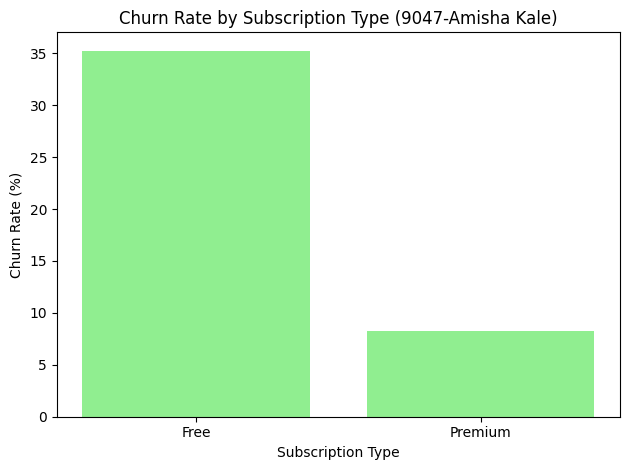

In [ ]:
churn_rate_sub = df.groupby("subscription_type_label")["churned"].mean().sort_values(ascending=False) * 100
print("\n13) Churn rate (%) by subscription type:")
display(churn_rate_sub.to_frame("churn_rate_pct"))

plt.figure()

plt.bar(churn_rate_sub.index.astype(str), churn_rate_sub.values, color='lightgreen')

plt.title("Churn Rate by Subscription Type (9047-Amisha Kale)")
plt.xlabel("Subscription Type")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

14. Examine the relationship between days since last login and churn.

<Figure size 640x480 with 0 Axes>

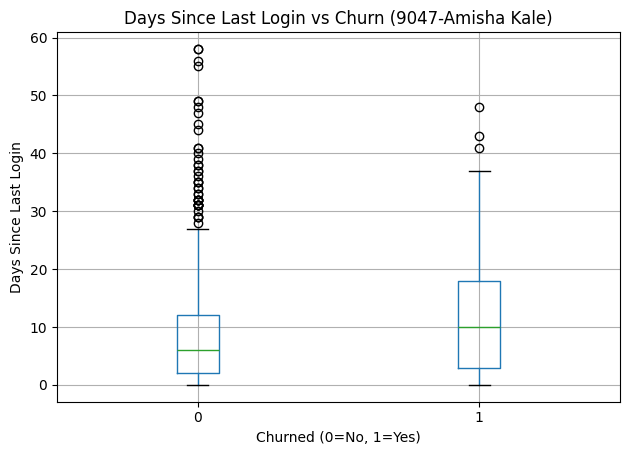


14) Churn rate (%) by inactivity bucket:


,churn_rate_pct
inactivity_bucket,
<=7d,14.364641
8-14d,13.698630
15-30d,34.224599
31-60d,27.450980


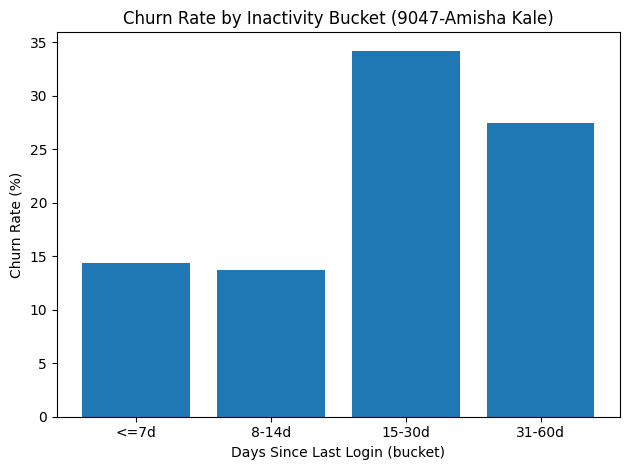

In [ ]:

if "days_since_last_login" in df.columns:

    plt.figure()
    df.boxplot(column="days_since_last_login", by="churned")
    plt.title("Days Since Last Login vs Churn (9047-Amisha Kale)")
    plt.suptitle("")
    plt.xlabel("Churned (0=No, 1=Yes)")
    plt.ylabel("Days Since Last Login")
    plt.tight_layout()
    plt.show()

    bins = [-np.inf, 7, 14, 30, 60, np.inf]
    labels = ["<=7d", "8-14d", "15-30d", "31-60d", "60d+"]
    df["inactivity_bucket"] = pd.cut(df["days_since_last_login"], bins=bins, labels=labels)
    churn_inactivity = df.groupby("inactivity_bucket", observed=True)["churned"].mean() * 100
    print("\n14) Churn rate (%) by inactivity bucket:")
    display(churn_inactivity.to_frame("churn_rate_pct"))
    plt.figure()
    plt.bar(churn_inactivity.index.astype(str), churn_inactivity.values)
    plt.title("Churn Rate by Inactivity Bucket (9047-Amisha Kale)")
    plt.xlabel("Days Since Last Login (bucket)")
    plt.ylabel("Churn Rate (%)")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("\n14) Column 'days_since_last_login' not found.")



15. Compare number of playlists created for churned vs non-churned users.


15) Number of playlists (churned vs non-churned):


,mean,median,min,max,count
churned,,,,,
0,3.632678,4.0,0,10,814
1,2.564516,3.0,0,9,186


<Figure size 640x480 with 0 Axes>

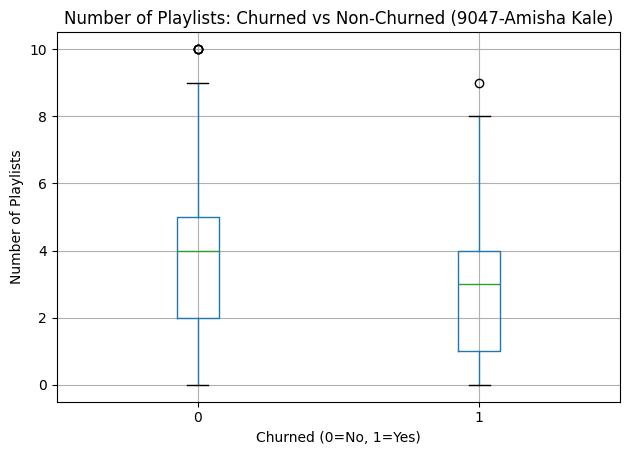

In [ ]:

if "number_of_playlists" in df.columns:
    playlists_comp = df.groupby("churned")["number_of_playlists"].agg(["mean", "median", "min", "max", "count"])
    print("\n15) Number of playlists (churned vs non-churned):")
    display(playlists_comp)

    plt.figure()
    df.boxplot(column="number_of_playlists", by="churned")
    plt.title("Number of Playlists: Churned vs Non-Churned (9047-Amisha Kale)")
    plt.suptitle("")
    plt.xlabel("Churned (0=No, 1=Yes)")
    plt.ylabel("Number of Playlists")
    plt.tight_layout()
    plt.show()
else:
    print("\n15) Column 'number_of_playlists' not found.")

16. Study how skips per day differ between churned and active users.


16) Skips per day (churned vs non-churned):


,mean,median,min,max,count
churned,,,,,
0,4.692875,5.0,0,14,814
1,4.360215,4.0,0,11,186


<Figure size 640x480 with 0 Axes>

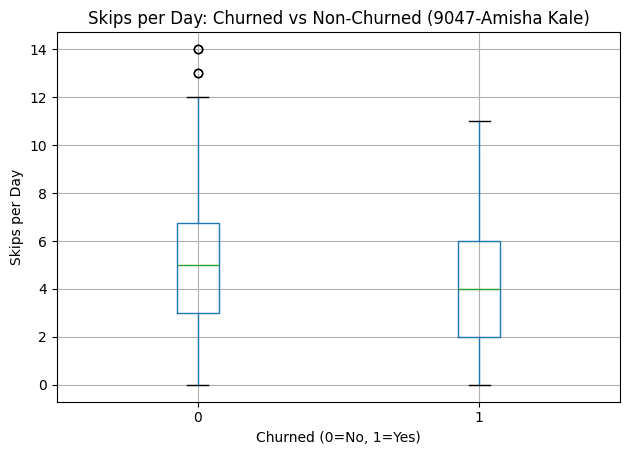

In [ ]:

if "skips_per_day" in df.columns:
    skips_comp = df.groupby("churned")["skips_per_day"].agg(["mean", "median", "min", "max", "count"])
    print("\n16) Skips per day (churned vs non-churned):")
    display(skips_comp)

    plt.figure()
    df.boxplot(column="skips_per_day", by="churned")
    plt.title("Skips per Day: Churned vs Non-Churned (9047-Amisha Kale)")
    plt.suptitle("")
    plt.xlabel("Churned (0=No, 1=Yes)")
    plt.ylabel("Skips per Day")
    plt.tight_layout()
    plt.show()
else:
    print("\n16) Column 'skips_per_day' not found.")

17. Analyze churn distribution across countries.

17) Churn by country (sorted by users):
         users  churn_rate_pct
country                       
PK         105       15.238095
RU         104       15.384615
CA         101       21.782178
AU         101       26.732673
UK         101        9.900990
DE         100       23.000000
FR         100       16.000000
IN          98       20.408163
BR          96       15.625000
US          94       22.340426


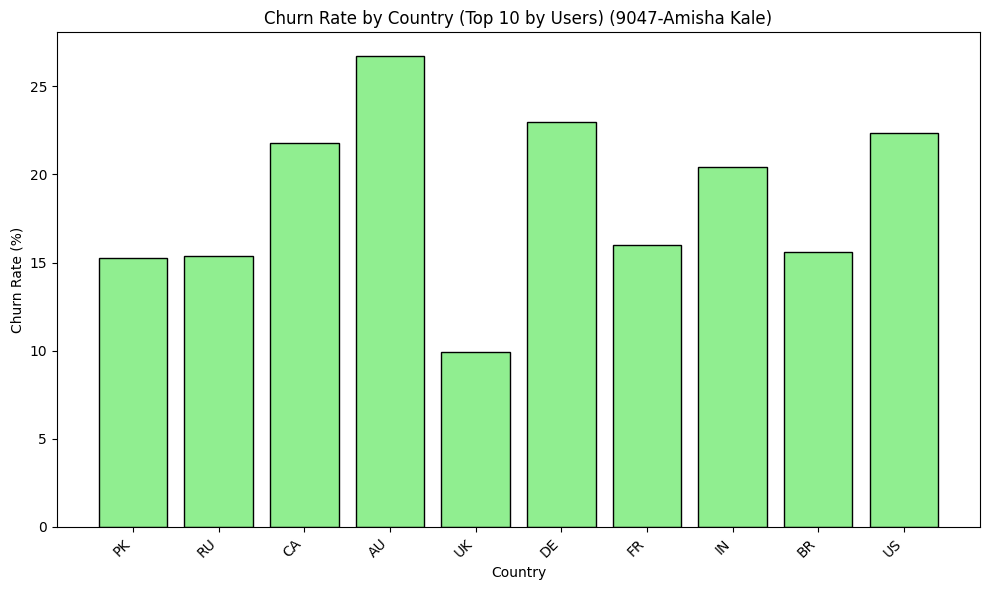

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/spotify_churn_dataset.csv")


churn_by_country = df.groupby("country")["churned"].mean().sort_values(ascending=False) * 100
country_counts = df["country"].value_counts()

churn_country_table = pd.DataFrame({
    "users": country_counts,
    "churn_rate_pct": churn_by_country
}).sort_values(by="users", ascending=False)

print("17) Churn by country (sorted by users):")
print(churn_country_table)

top_countries = churn_country_table.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_countries.index.astype(str), top_countries["churn_rate_pct"].values, color='lightgreen', edgecolor='black')
plt.title("Churn Rate by Country (Top 10 by Users) (9047-Amisha Kale)")
plt.xlabel("Country")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

18. Examine whether support tickets are associated with higher churn.


18) Support tickets (churned vs non-churned):


,mean,median,min,max,count
churned,,,,,
0,0.183047,0.0,0,2,814
1,0.446237,0.0,0,2,186



18) Churn rate (%) by support tickets bucket:


,churn_rate_pct
tickets_bucket,
0,14.303329
1,39.041096
2,30.232558


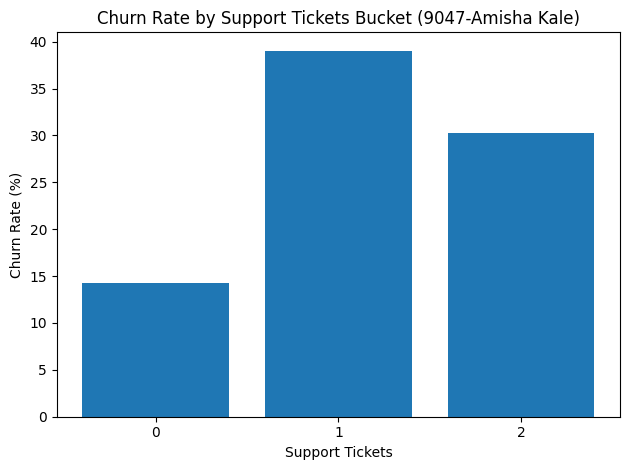

In [ ]:

if "support_tickets" in df.columns:
    tickets_comp = df.groupby("churned")["support_tickets"].agg(["mean", "median", "min", "max", "count"])
    print("\n18) Support tickets (churned vs non-churned):")
    display(tickets_comp)


    bins = [-np.inf, 0, 1, 2, 5, np.inf]
    labels = ["0", "1", "2", "3-5", "6+"]
    df["tickets_bucket"] = pd.cut(df["support_tickets"], bins=bins, labels=labels)
    churn_by_tickets = df.groupby("tickets_bucket", observed=True)["churned"].mean() * 100
    print("\n18) Churn rate (%) by support tickets bucket:")
    display(churn_by_tickets.to_frame("churn_rate_pct"))

    plt.figure()
    plt.bar(churn_by_tickets.index.astype(str), churn_by_tickets.values)
    plt.title("Churn Rate by Support Tickets Bucket (9047-Amisha Kale)")
    plt.xlabel("Support Tickets")
    plt.ylabel("Churn Rate (%)")
    plt.tight_layout()
    plt.show()
else:
    print("\n18) Column 'support_tickets' not found.")


19. Compare top genres preferred by churned vs retained users.


19) Top 10 genres: churned vs retained counts:


,retained(0),churned(1)
top_genre,,
Country,130,33
Hip-Hop,121,32
Rock,122,25
Classical,118,27
Electronic,113,29
Jazz,102,28
Pop,108,12


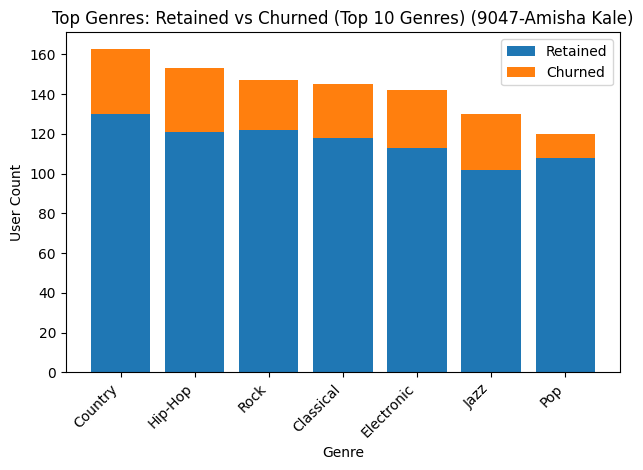


19) Churn rate (%) within top 10 genres:


,churn_rate_pct
top_genre,
Country,20.245399
Hip-Hop,20.915033
Rock,17.006803
Classical,18.620690
Electronic,20.422535
Jazz,21.538462
Pop,10.000000


In [ ]:

if "top_genre" in df.columns:

    top10 = df["top_genre"].value_counts().head(10).index
    genre_ct = pd.crosstab(df["top_genre"], df["churned"]).loc[top10]
    genre_ct.columns = ["retained(0)", "churned(1)"]
    print("\n19) Top 10 genres: churned vs retained counts:")
    display(genre_ct)


    plt.figure()
    x = np.arange(len(genre_ct.index))
    plt.bar(x, genre_ct["retained(0)"].values, label="Retained")
    plt.bar(x, genre_ct["churned(1)"].values, bottom=genre_ct["retained(0)"].values, label="Churned")
    plt.title("Top Genres: Retained vs Churned (Top 10 Genres) (9047-Amisha Kale)")
    plt.xlabel("Genre")
    plt.ylabel("User Count")
    plt.xticks(x, genre_ct.index.astype(str), rotation=45, ha="right")
    plt.legend()
    plt.tight_layout()
    plt.show()


    churn_by_genre = (genre_ct["churned(1)"] / (genre_ct["retained(0)"] + genre_ct["churned(1)"])) * 100
    print("\n19) Churn rate (%) within top 10 genres:")
    display(churn_by_genre.to_frame("churn_rate_pct"))
else:
    print("\n19) Column 'top_genre' not found.")

20. Visualize avg daily minutes vs skips per day using a scatter plot.

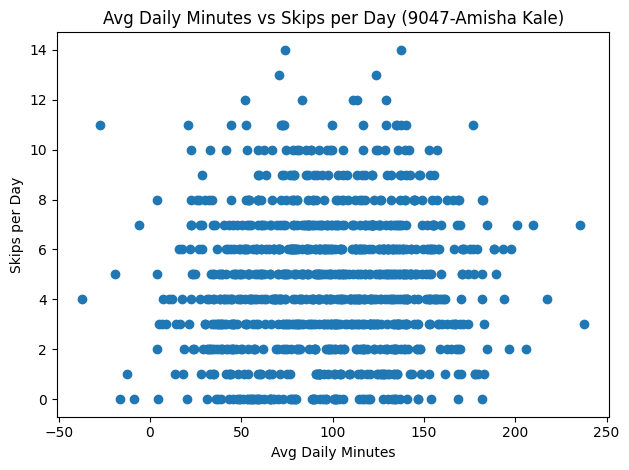

In [ ]:

if "avg_daily_minutes" in df.columns and "skips_per_day" in df.columns:
    plt.figure()
    plt.scatter(df["avg_daily_minutes"], df["skips_per_day"])
    plt.title("Avg Daily Minutes vs Skips per Day (9047-Amisha Kale)")
    plt.xlabel("Avg Daily Minutes")
    plt.ylabel("Skips per Day")
    plt.tight_layout()
    plt.show()
else:
    print("\n20) Required columns not found for scatter plot.")

21. Identify usage patterns of high-engagement users (high minutes, low skips).

In [ ]:

if "avg_daily_minutes" in df.columns and "skips_per_day" in df.columns:
    minutes_thr = df["avg_daily_minutes"].quantile(0.80)
    skips_thr = df["skips_per_day"].quantile(0.20)
    df["high_engagement"] = (df["avg_daily_minutes"] >= minutes_thr) & (df["skips_per_day"] <= skips_thr)

    he_count = int(df["high_engagement"].sum())
    he_churn_rate = df.loc[df["high_engagement"], "churned"].mean() * 100 if he_count > 0 else np.nan
    non_he_churn_rate = df.loc[~df["high_engagement"], "churned"].mean() * 100

    print("\n21) High-engagement definition: minutes >= 80th percentile AND skips <= 20th percentile")
    print("    Minutes threshold (80th pct):", float(minutes_thr))
    print("    Skips threshold (20th pct)  :", float(skips_thr))
    print("    High-engagement users count :", he_count)
    print("    Churn rate (%) high-engagement:", round(float(he_churn_rate), 2))
    print("    Churn rate (%) others        :", round(float(non_he_churn_rate), 2))

    he_table = pd.DataFrame({
        "group": ["High-engagement", "Others"],
        "users": [he_count, int((~df["high_engagement"]).sum())],
        "churn_rate_pct": [he_churn_rate, non_he_churn_rate]
    })
    display(he_table)


21) High-engagement definition: minutes >= 80th percentile AND skips <= 20th percentile
    Minutes threshold (80th pct): 135.3
    Skips threshold (20th pct)  : 2.0
    High-engagement users count : 36
    Churn rate (%) high-engagement: 8.33
    Churn rate (%) others        : 18.98


,group,users,churn_rate_pct
0,High-engagement,36,8.333333
1,Others,964,18.983402


22. Analyze churn among users with long inactivity periods.

In [ ]:

if "days_since_last_login" in df.columns:
    long_inactive_thr = df["days_since_last_login"].quantile(0.75)
    df["long_inactive"] = df["days_since_last_login"] >= long_inactive_thr

    long_inactive_rate = df.loc[df["long_inactive"], "churned"].mean() * 100
    others_rate = df.loc[~df["long_inactive"], "churned"].mean() * 100

    print("\n22) Long inactivity threshold (75th percentile):", float(long_inactive_thr))
    table22 = pd.DataFrame({
        "group": [f"Long inactive (>= {round(float(long_inactive_thr),2)} days)", "Others"],
        "users": [int(df["long_inactive"].sum()), int((~df["long_inactive"]).sum())],
        "churn_rate_pct": [long_inactive_rate, others_rate]
    })
    display(table22)


22) Long inactivity threshold (75th percentile): 14.0


,group,users,churn_rate_pct
0,Long inactive (>= 14.0 days),255,30.980392
1,Others,745,14.362416


23. Compare churn rates between users with zero vs multiple playlists.


23) Churn rate (%) by playlist group:


,users,churn_rate_pct
playlist_group,,
One or more playlists,866,16.974596
Zero playlists,134,29.104478


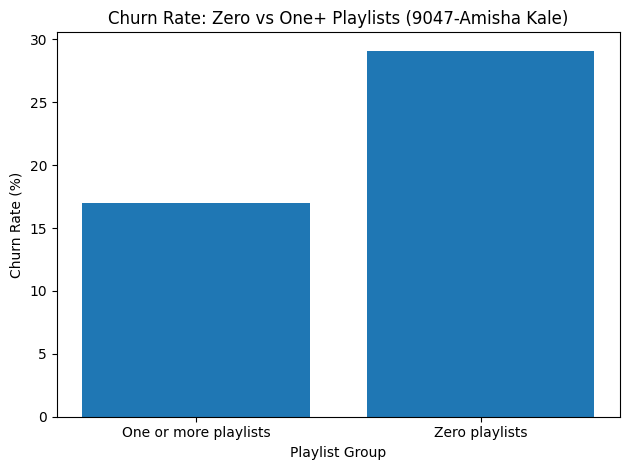

In [ ]:

if "number_of_playlists" in df.columns:
    df["playlist_group"] = np.where(df["number_of_playlists"] == 0, "Zero playlists", "One or more playlists")
    churn_playlist_group = df.groupby("playlist_group")["churned"].mean() * 100
    count_playlist_group = df["playlist_group"].value_counts()
    table23 = pd.DataFrame({
        "users": count_playlist_group,
        "churn_rate_pct": churn_playlist_group
    })
    print("\n23) Churn rate (%) by playlist group:")
    display(table23)

    plt.figure()
    plt.bar(table23.index.astype(str), table23["churn_rate_pct"].values)
    plt.title("Churn Rate: Zero vs One+ Playlists (9047-Amisha Kale)")
    plt.xlabel("Playlist Group")
    plt.ylabel("Churn Rate (%)")
    plt.tight_layout()
    plt.show()

24. Identify key features that appear to be strong indicators of churn.

In [ ]:

corrs = []
for c in num_cols:
    if c in df.columns:
        corr = df[[c, "churned"]].corr(numeric_only=True).iloc[0, 1]
        corrs.append((c, corr))
corr_df = pd.DataFrame(corrs, columns=["feature", "corr_with_churn"]).dropna()
corr_df["abs_corr"] = corr_df["corr_with_churn"].abs()
corr_df = corr_df.sort_values("abs_corr", ascending=False)

print("\n24) Numeric feature correlations with churn (sorted by |corr|):")
display(corr_df)


cat_candidates = [c for c in ["subscription_type_label", "country", "top_genre"] if c in df.columns]
cat_spreads = []
for c in cat_candidates:
    rates = df.groupby(c)["churned"].mean()
    if len(rates) >= 2:
        spread = (rates.max() - rates.min()) * 100
        cat_spreads.append((c, spread, len(rates)))
cat_spread_df = pd.DataFrame(cat_spreads, columns=["categorical_feature", "churn_rate_spread_pct", "num_categories"]).sort_values(
    "churn_rate_spread_pct", ascending=False
)

print("\n24) Categorical churn-rate spread (max-min) for key categorical features:")
display(cat_spread_df)


24) Numeric feature correlations with churn (sorted by |corr|):


,feature,corr_with_churn,abs_corr
0,avg_daily_minutes,-0.284338,0.284338
3,support_tickets,0.199247,0.199247
1,number_of_playlists,-0.178930,0.178930
4,days_since_last_login,0.140611,0.140611
2,skips_per_day,-0.046632,0.046632



24) Categorical churn-rate spread (max-min) for key categorical features:


,categorical_feature,churn_rate_spread_pct,num_categories
0,country,16.831683,10
1,top_genre,11.538462,7


25. Based on EDA, write 3 key insights and 2 user-retention recommendations.

In [ ]:

insights = []
if len(churn_rate_sub) >= 2:
    top_sub = churn_rate_sub.idxmax()
    low_sub = churn_rate_sub.idxmin()
    insights.append(
        f"Users on '{top_sub}' show a higher churn rate than '{low_sub}' (difference ≈ {round(float(churn_rate_sub.max() - churn_rate_sub.min()), 2)} percentage points)."
    )
if "inactivity_bucket" in df.columns:
    tmp = df.groupby("inactivity_bucket", observed=True)["churned"].mean() * 100
    if len(tmp) > 0:
        insights.append(f"Churn increases with inactivity; the highest churn bucket is '{tmp.idxmax()}' (≈ {round(float(tmp.max()),2)}%).")


if "high_engagement" in df.columns:
    insights.append(
        f"High-engagement users (high minutes + low skips) have churn ≈ {round(float(he_churn_rate),2)}% vs others ≈ {round(float(non_he_churn_rate),2)}%."
    )
recs = []
if "days_since_last_login" in df.columns:
    recs.append("Trigger win-back notifications and personalized playlists for users who haven’t logged in for 15–30+ days (inactivity strongly relates to churn).")
if "support_tickets" in df.columns:
    recs.append("Prioritize fast support resolution and proactive follow-ups for users raising multiple tickets (higher friction tends to correlate with churn).")
print("\n25) 3 Key Insights (from EDA):")
for i, s in enumerate(insights[:3], start=1):
    print(f"   {i}. {s}")
print("\n25) 2 User-Retention Recommendations:")
for i, s in enumerate(recs[:2], start=1):
    print(f"   {i}. {s}")


25) 3 Key Insights (from EDA):
   1. Users on 'Free' show a higher churn rate than 'Premium' (difference ≈ 26.98 percentage points).
   2. High-engagement users (high minutes + low skips) have churn ≈ 8.33% vs others ≈ 18.98%.

25) 2 User-Retention Recommendations:
   1. Trigger win-back notifications and personalized playlists for users who haven’t logged in for 15–30+ days (inactivity strongly relates to churn).
   2. Prioritize fast support resolution and proactive follow-ups for users raising multiple tickets (higher friction tends to correlate with churn).


# **Machine Learning **

MODEL BUILDING USING Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("spotify_churn_dataset.csv")

In [ ]:
print(df.head())

  user_id subscription_type country  avg_daily_minutes  number_of_playlists  \
0  user_1           Premium      US              134.9                    4   
1  user_2           Premium      PK              165.7                    5   
2  user_3              Free      DE               45.9                    3   
3  user_4           Premium      PK              106.0                    0   
4  user_5           Premium      US               89.6                    5   

    top_genre  skips_per_day  support_tickets  days_since_last_login  churned  
0  Electronic              6                0                      1        0  
1         Pop              8                0                     12        0  
2   Classical              3                0                      3        0  
3        Jazz              7                0                      3        0  
4     Country              2                1                      6        0  


In [ ]:

le = LabelEncoder()

df['subscription_type'] = le.fit_transform(df['subscription_type'])
df['country'] = le.fit_transform(df['country'])
df['top_genre'] = le.fit_transform(df['top_genre'])
df = df.drop(['user_id'], axis=1)
X = df.drop('churned', axis=1)
y = df['churned']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train

,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login
29,0,4,72.1,0,6,9,0,35
535,1,7,153.6,3,2,5,0,3
695,0,7,90.9,3,4,1,0,3
557,1,1,153.4,5,6,9,0,37
836,0,1,81.4,0,1,3,0,27
...,...,...,...,...,...,...,...,...
106,1,3,120.2,5,1,3,0,5
270,0,9,59.3,6,4,10,0,2
860,1,9,55.4,6,4,0,0,2
435,1,2,154.2,4,5,8,1,4


In [ ]:
X_test

,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login
521,0,1,92.1,0,0,4,0,5
737,1,3,131.1,7,4,5,0,45
740,0,8,88.5,1,4,0,0,6
660,1,9,113.1,3,1,5,2,2
411,1,3,135.5,4,6,3,0,3
...,...,...,...,...,...,...,...,...
408,0,9,104.8,1,3,4,2,0
332,1,6,136.2,3,4,5,0,1
208,0,4,72.9,2,2,5,0,24
613,0,2,61.5,5,6,5,0,19


In [ ]:
y_train

,churned
29,0
535,0
695,1
557,1
836,0
...,...
106,0
270,0
860,0
435,1


In [ ]:
y_test

,churned
521,0
737,0
740,0
660,0
411,0
...,...
408,1
332,0
208,0
613,0


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84

Confusion Matrix:
 [[158   6]
 [ 26  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       164
           1       0.62      0.28      0.38        36

    accuracy                           0.84       200
   macro avg       0.74      0.62      0.65       200
weighted avg       0.82      0.84      0.81       200

